In [11]:
import csv 
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [12]:
dates = []
prices = []

In [17]:
def get_data(filename):

    with open(filename, 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader)
        for row in csvFileReader:
            dates.append(int(row[0].split('/')[1]))
            prices.append(float(row[3][1:]))
    return

def predict_prices(dates, prices, x):
    dates = np.reshape(dates, (len(dates), 1))

    svr_lin = SVR(kernel='linear', C=1e3)
    svr_poly = SVR(kernel='poly', C=1e3, degree=2)
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

    svr_lin.fit(dates, prices)
    svr_poly.fit(dates, prices)
    svr_rbf.fit(dates, prices)

    plt.scatter(dates, prices, color='black', label='Data')
    plt.plot(dates, svr_rbf.predict(dates), color='red', label='RBF Model')
    plt.plot(dates, svr_poly.predict(dates), color='green', label='Linear Model')
    plt.plot(dates, svr_lin.predict(dates), color='blue', label='Polynomial Model')

    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()

    return svr_lin.predict(x)[0], svr_poly.predict(x)[0], svr_rbf.predict(x)[0]


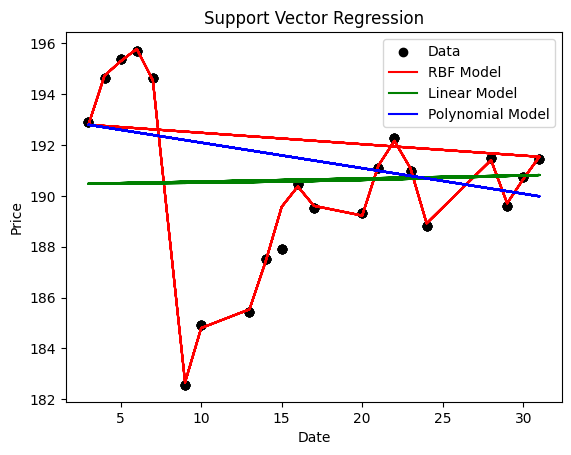

(189.98444444412527, 190.82298143609805, 191.54037301336675)


In [23]:
get_data('AAPL_1M.csv')

predicted = predict_prices(dates, prices, [[31]])
print(predicted)

# print(dates, prices)
